<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Nisha_2211566_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code to Plot Losses inline in this notebook

In [1]:
%matplotlib inline

## The Task for the AI



## Prerequisite 

In [2]:
import numpy as np                 # advanced math library
import matplotlib.pyplot as plt    # MATLAB like plotting routines
import random                      # For generating random number
%matplotlib inline


from keras.datasets import mnist      # MNIST dataset is included in keras
from keras.models import Sequential   # Model type to be used

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Loading Training Data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


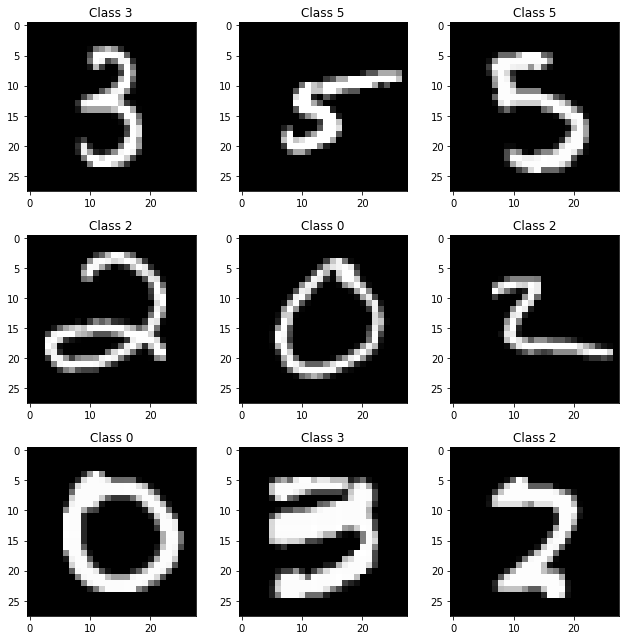

In [4]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0,len(X_train))
  plt.imshow(X_train[num], cmap = 'gray', interpolation = 'none')
  plt.title("Class {}".format(y_train[num]))

plt.tight_layout()




In [5]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0   14  103  255  207    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0    0   59  213  253  253  250   94   94   94   94    6    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   0   61  198  253  253  253  253  253  253  253  253  245  169   90   12   0  0  0  0  0  0  0  
0  0  0  0  0  0  12  209  253  253  253  253  253  253  253  253  253  253  253

In [6]:
X_train = X_train.reshape(60000, 784)   # reshape 60,000 28*28 matrices into
X_test = X_test.reshape(10000, 784)     # reshape 10,000 28*28 matrices into

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255   # normalize each value for each pixel 


In [7]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)      

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [8]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [9]:
# The Sequential model is a linear stack of layers
model = Sequential()

In [10]:
# The first hidden layer is a set of 512 nodes (artifical neurons)
# Each 
model.add(Dense(512, input_shape = (784,)))

In [11]:
model.add(Activation('relu'))

In [12]:
model.add(Dropout(0.2))

In [13]:
# Adding Second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The Final Output Layer

In [14]:
model.add(Dense(10))

In [15]:
model.add(Activation('softmax'))

In [16]:
# Summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

What are trainable and non- trininable parametersin the summary

## Compiling the model

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',
              metrics = ['accuracy'])


In [18]:
model.fit(X_train, Y_train,
          batch_size=128, epochs = 10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 12s 23ms/step - loss: 0.2492 - accuracy: 0.9254
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1012 - accuracy: 0.9687
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0728 - accuracy: 0.9772
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0566 - accuracy: 0.9821
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0463 - accuracy: 0.9848
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0407 - accuracy: 0.9868
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0353 - accuracy: 0.9883
Epoch 8/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0291 - accuracy: 0.9901
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0273 - accuracy: 0.9907
Epoch 10/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0252 - accu

In [19]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0709 - accuracy: 0.9833
Test score: 0.07088526338338852
Test accuracy: 0.983299970626831


In [21]:
predicted_x = model.predict(X_test)
predicted_classes = np.argmax(predicted_x, axis = 1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 2s 7ms/step


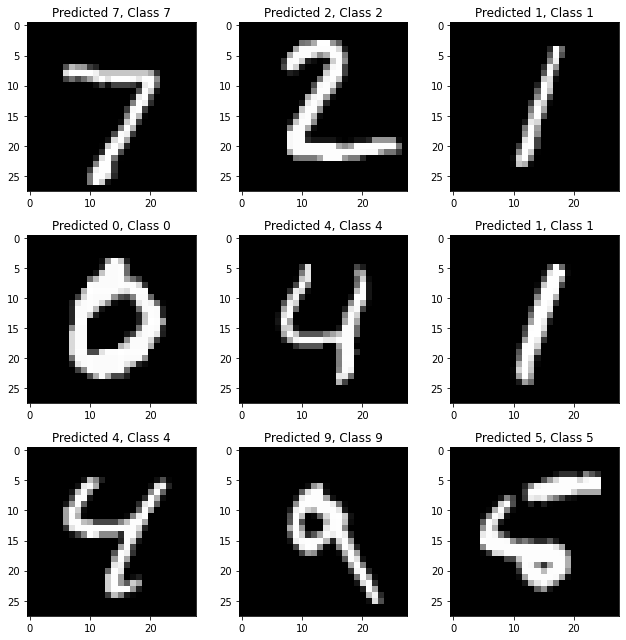

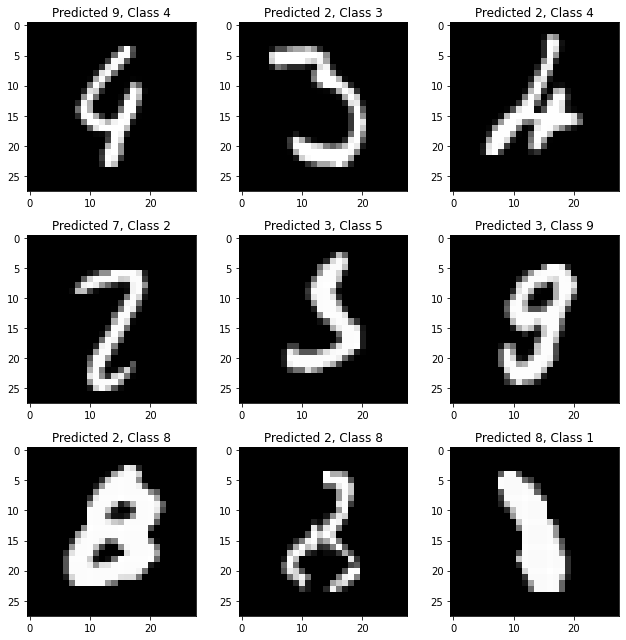

In [22]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

Building a "Deep" Convolutional Neural Network

In [28]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D,Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
X_train = X_train.reshape(60000, 784)   # reshape 60,000 28*28 matrices into
X_test = X_test.reshape(10000, 784)     # reshape 10,000 28*28 matrices into

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255   # normalize each value for each pixel 

In [31]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [34]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [35]:
model = Sequential()